<a href="https://colab.research.google.com/github/Rushikesh419/capstone-project-3/blob/main/life_expectancy_%20EDA%20REFINED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize

In [28]:
data=pd.read_csv('/content/drive/MyDrive/Life Expectancy Data.csv')

In [29]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [30]:
data.shape

(2938, 22)

In [31]:
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [32]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [33]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [34]:
data.rename(columns = {" BMI " :"BMI",
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_mortality                  2928 non-null   float64
 5   Infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage_expenditure           2938 non-null   float64
 8   HepatitisB                       2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under_five_deaths                2938 non-null   int64  
 12  Polio               

In [36]:
data.nunique(axis=0)

Country                             193
Year                                 16
Status                                2
Life_expectancy                     362
Adult_mortality                     425
Infant_deaths                       209
Alcohol                            1076
Percentage_expenditure             2328
HepatitisB                           87
Measles                             958
BMI                                 608
Under_five_deaths                   252
Polio                                73
Total_expenditure                   818
Diphtheria                           81
HIV/AIDS                            200
GDP                                2490
Population                         2278
Thinness_1-19_years                 200
Thinness_5-9_years                  207
Income_composition_of_resources     625
Schooling                           173
dtype: int64

In [37]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [38]:
data.reset_index(inplace=True)

first we have to groupby by country because we can not mix up values and stats of other countries

we can not fill missing values using mean because of outliers. and also cannot fill it by using median because data divided into countries by years
SO WE HAVE TO USE INTERPOLATE VALUE USING COUNTRY

In [39]:
data.groupby('Country').apply(lambda x:x.interpolate(method='linear'))

<ipython-input-39-103e404fc7c8>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data.groupby('Country').apply(lambda x:x.interpolate(method='linear'))


,index,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [40]:
data.isnull().sum()

index                                0
Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

There are two reasons behind it.

1) countries data for all the null values are null for each year.

2) Many countires have first value as null and this method doesn't fill first null entry.

So, the next possible method would be fill the missing values using median but yearwise

In [41]:
imputed_data=[]
for year in list(data.Year.unique()):
  year_data=data[data.Year==year].copy()
  for col in list(year_data.columns)[4:]:
    year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
data = pd.concat(imputed_data).copy()

In [42]:
data.describe()

,index,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
count,55822.000000,55822.000000,55822.000000,55822.000000,55822.000000,55822.000000,55822.000000,55822.000000,55822.000000,55822.000000,...,55822.000000,55822.000000,55822.000000,55822.000000,55822.000000,5.582200e+04,55822.000000,55822.000000,55822.000000,55822.000000
mean,1468.500000,2007.518720,69.238462,164.695031,30.303948,4.637600,738.251295,82.644656,2419.592240,38.386555,...,82.605344,6.005061,82.374575,1.742103,6657.444137,1.024153e+07,4.822362,4.852689,0.630526,12.013513
std,848.135093,4.613097,9.508926,124.072432,117.907487,3.920674,1987.594321,22.878200,11465.423476,19.936477,...,23.358961,2.416020,23.645477,5.076966,13282.854177,5.401213e+07,4.396757,4.484951,0.205345,3.267260
min,0.000000,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,734.000000,2004.000000,63.200000,74.000000,0.000000,1.080000,4.673592,82.000000,0.000000,19.400000,...,78.000000,4.370000,78.000000,0.100000,579.724150,4.187380e+05,1.600000,1.600000,0.504000,10.300000
50%,1468.500000,2008.000000,72.100000,144.000000,3.000000,4.100000,64.912906,91.000000,17.000000,43.450000,...,93.000000,5.895000,93.000000,0.100000,1791.067713,1.412669e+06,3.300000,3.300000,0.681000,12.300000
75%,2203.000000,2012.000000,75.600000,227.000000,22.000000,7.390000,441.844624,96.000000,361.000000,56.100000,...,97.000000,7.330000,97.000000,0.800000,4781.388800,4.586897e+06,7.100000,7.200000,0.772000,14.100000
max,2937.000000,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [43]:
data.isnull().sum()

index                              0
Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19_years                0
Thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

now deal with an outliars

In [44]:
col_dict = {'Life_expectancy':1,'Adult_mortality':2,'Infant_deaths':3,'Alcohol':4,'Percentage_expenditure':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_five_deaths':9,'Polio':10,'Total_expenditure':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'Thinness_1-19_years':16,'Thinness_5-9_years':17,'Income_composition_of_resources':18,'Schooling':19}


detect outlier in each variable using box plot

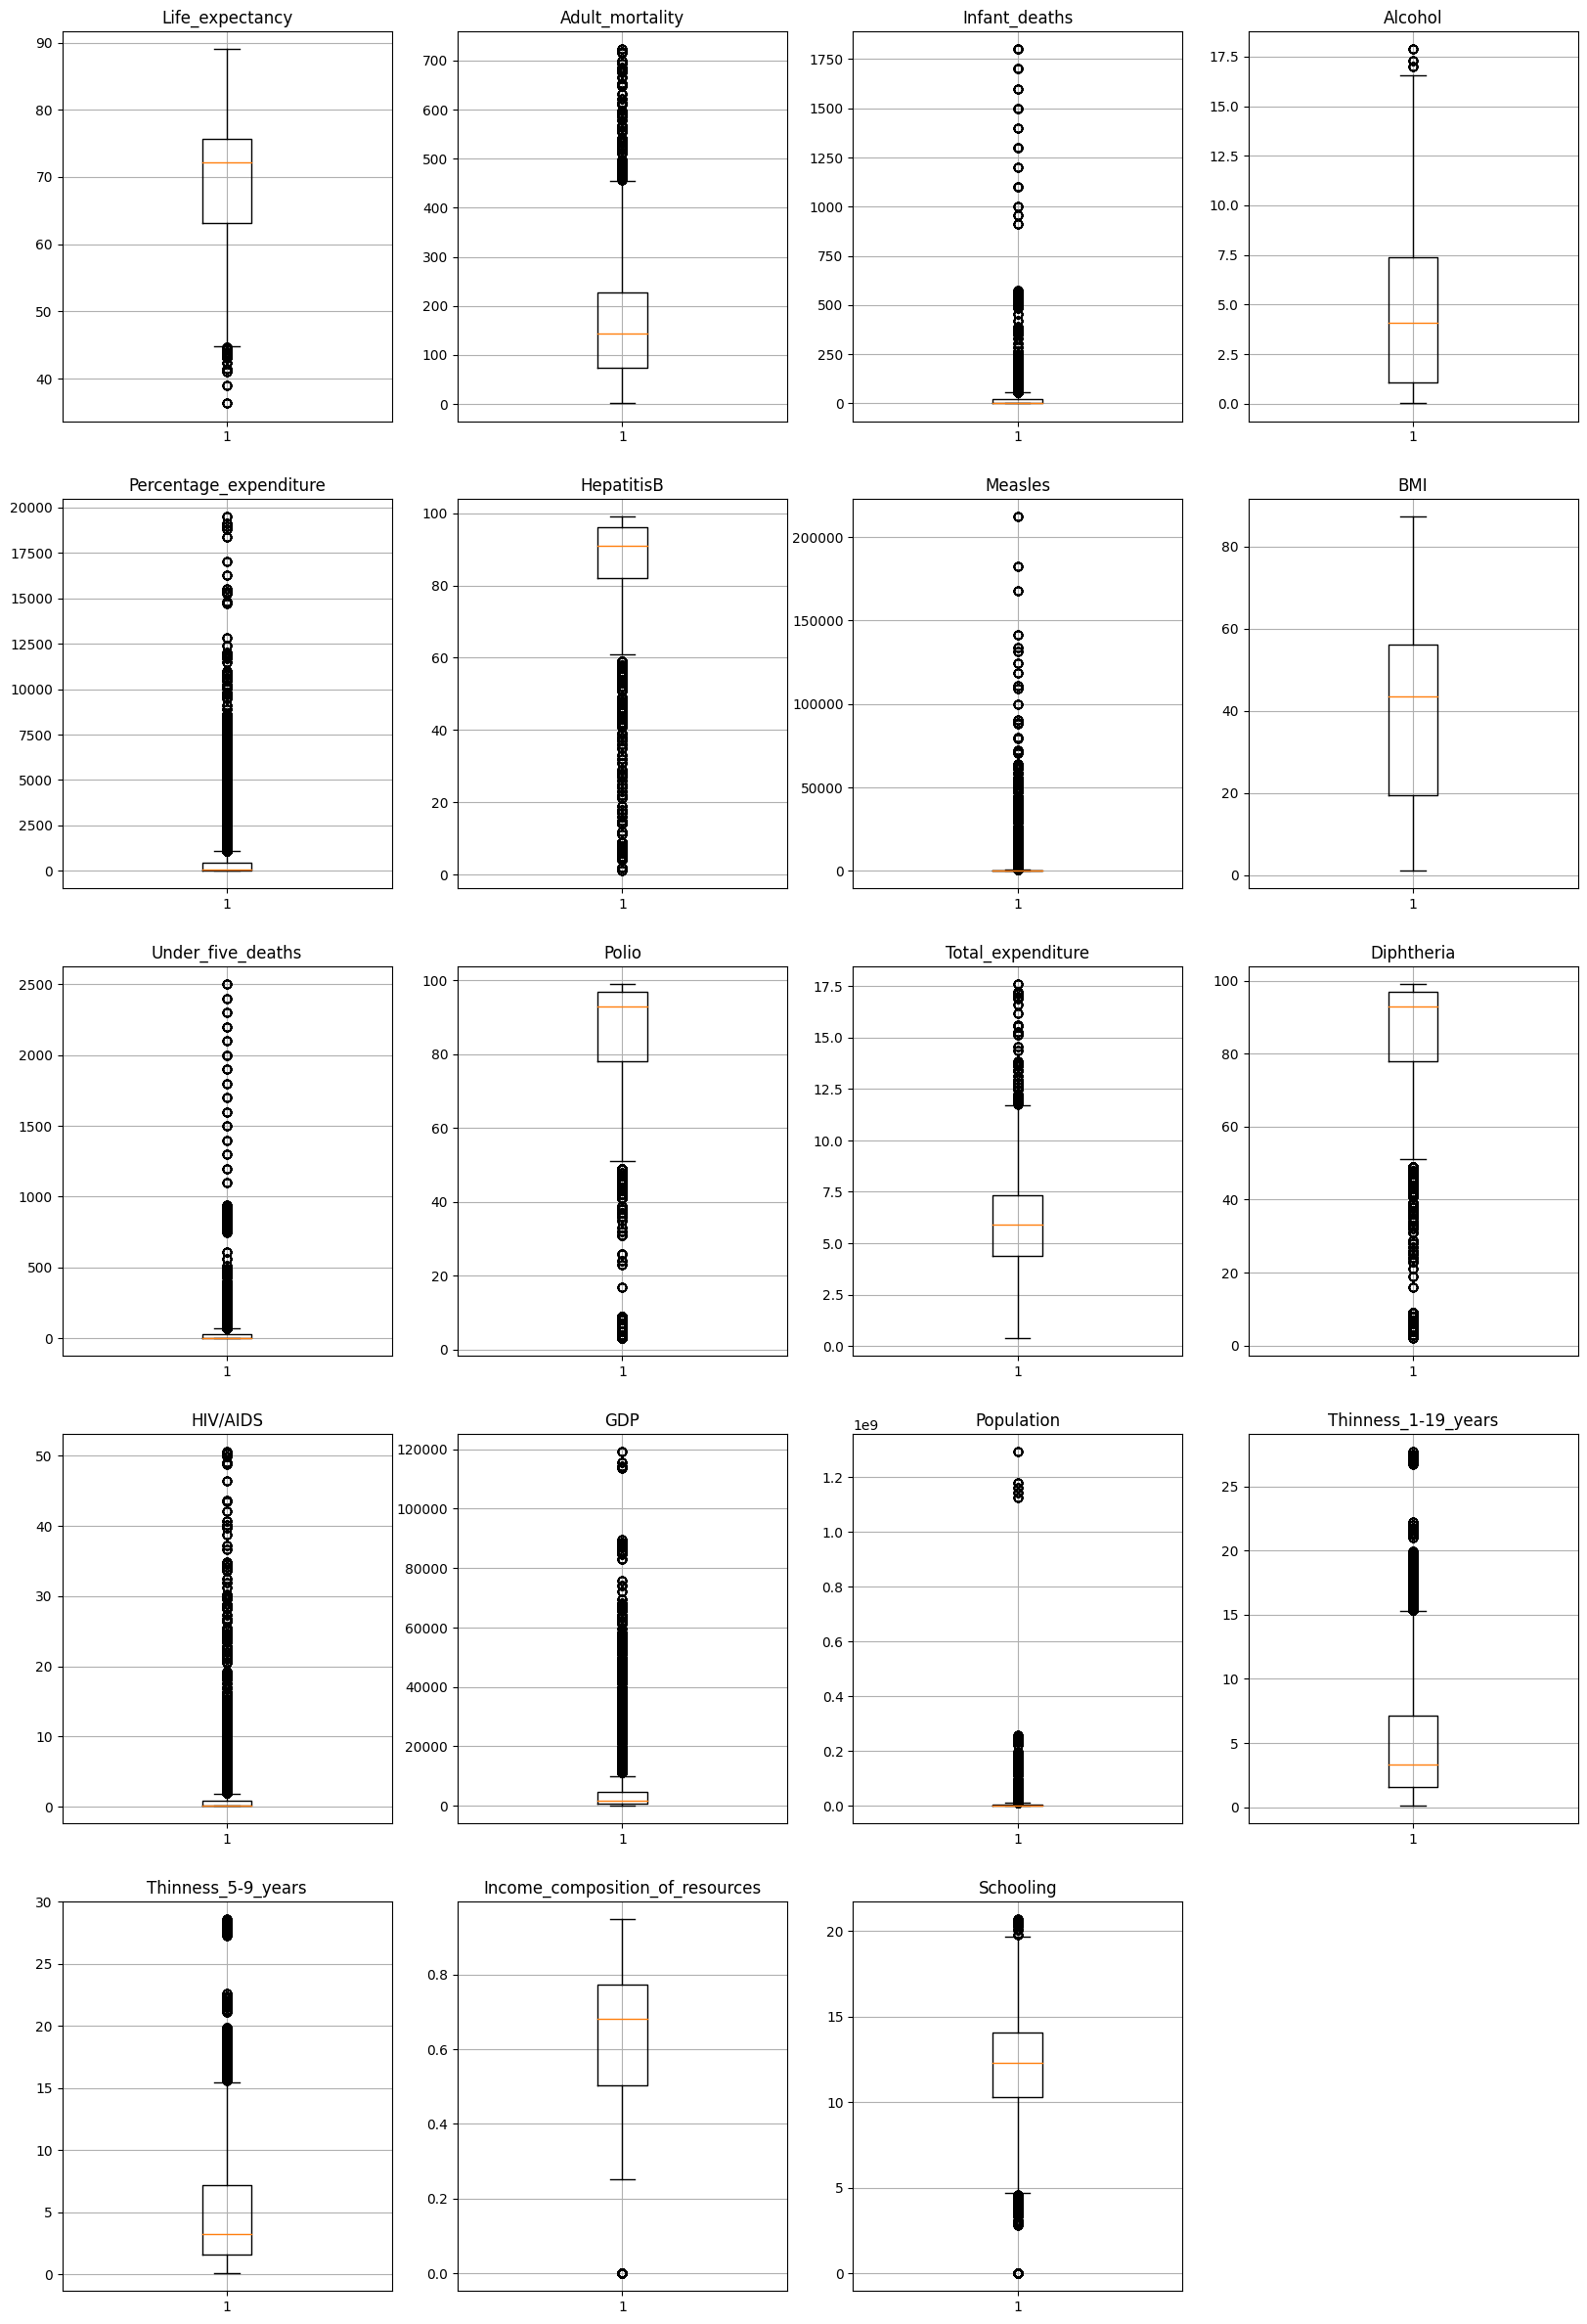

In [45]:
fig=plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable])
                     plt.title(variable)
                     plt.grid(True)

plt.show()

Infant_Deaths represents number of Infant Deaths per 1000 population. That is why number beyond 1000 is unrealistic. So we will remove them as outliers.

Same applies to Measles and Under_five_deaths because both are number per 1000 population.

As we can see that some countries are spending as high as 20000% of their GDP on health. Most of the countires are spending under 2500% of their GDP on health. Since values are very large in columns of Percentage_expenditure, GDP, and Population, it's better to take a log value or use winsorization if required.

The BMI values are very unrealistic because the value more 40 considered as extreme obesity. The median is more than 40. and some country/countries has mean around 60 which is not possible. We may drop that entire column.

Since pretty much every column other has outliers we can use winsorization.

In [46]:
data=data[data['Infant_deaths']<1001]
data=data[data['Measles']<1001]
data=data[data['Under_five_deaths']<1001]

In [47]:
data.drop(['BMI'],axis=1,inplace=True)

In [48]:
data['log_Percentage_expenditure'] = np.log(data['Percentage_expenditure'])
data['log_Population'] = np.log(data['Population'])
data['log_GDP'] = np.log(data['GDP'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
data = data.replace([np.inf, -np.inf], 0)
data['log_Percentage_expenditure']

16      5.899829
32      0.000000
48      0.000000
64      0.000000
80      0.000000
          ...   
2825    6.470735
2841    3.881758
2857    3.086521
2873    0.000000
2905    0.000000
Name: log_Percentage_expenditure, Length: 45847, dtype: float64

In [51]:
data['winz_Life_expectancy'] = winsorize(data['Life_expectancy'], (0.05,0))
data['winz_Adult_mortality'] = winsorize(data['Adult_mortality'], (0,0.04))
data['winz_Alcohol'] = winsorize(data['Alcohol'], (0.0,0.01))
data['winz_HepatitisB'] = winsorize(data['HepatitisB'], (0.20,0.0))
data['winz_Polio'] = winsorize(data['Polio'], (0.20,0.0))
data['winz_Total_expenditure'] = winsorize(data['Total_expenditure'], (0.0,0.02))
data['winz_Diphtheria'] = winsorize(data['Diphtheria'], (0.11,0.0))
data['winz_HIV/AIDS'] = winsorize(data['HIV/AIDS'], (0.0,0.21))
data['winz_Thinness_1-19_years'] = winsorize(data['Thinness_1-19_years'], (0.0,0.04))
data['winz_Thinness_5-9_years'] = winsorize(data['Thinness_5-9_years'], (0.0,0.04))
data['winz_Income_composition_of_resources'] = winsorize(data['Income_composition_of_resources'], (0.05,0.0))
data['winz_Schooling'] = winsorize(data['Schooling'], (0.03,0.01))

In [52]:
col_dict_winz = {'winz_Life_expectancy':1,'winz_Adult_mortality':2,'Infant_deaths':3,'winz_Alcohol':4,
            'log_Percentage_expenditure':5,'winz_HepatitisB':6,'Measles':7,'Under_five_deaths':8,'winz_Polio':9,
            'winz_Total_expenditure':10,'winz_Diphtheria':11,'winz_HIV/AIDS':12,'log_GDP':13,'log_Population':14,
            'winz_Thinness_1-19_years':15,'winz_Thinness_5-9_years':16,'winz_Income_composition_of_resources':17,
            'winz_Schooling':18}


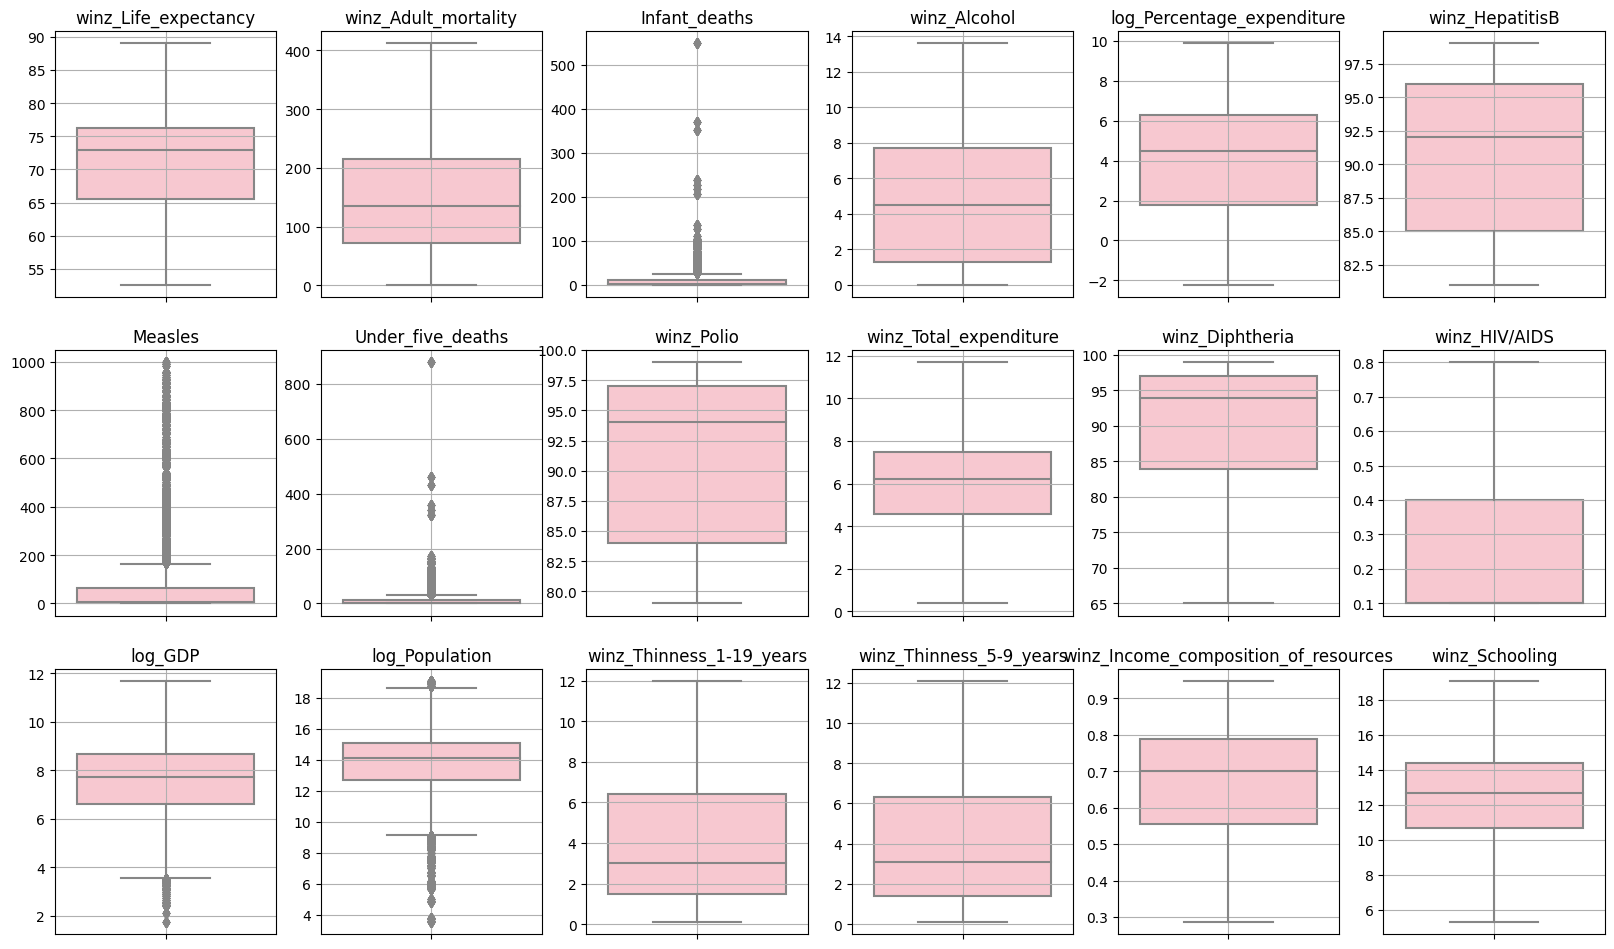

In [54]:
fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     sns.boxplot(y = data[variable], color = "pink")
                     plt.title(variable)
                     plt.ylabel('')

                     plt.grid(True)

plt.show()

In [55]:
data.shape

(45847, 37)

In [56]:
data.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [57]:
data.Country.unique()

array(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea", 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Ireland',
       'Israel', 'Italy', 'Jamaica',

In [58]:
data.Country.nunique()

190

In [59]:
data.groupby('Status').Country.nunique()

Status
Developed      32
Developing    158
Name: Country, dtype: int64

In [60]:
data.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

After imputing missing values and dealing with outliers, we are left with 2413 rows.
now data exploration


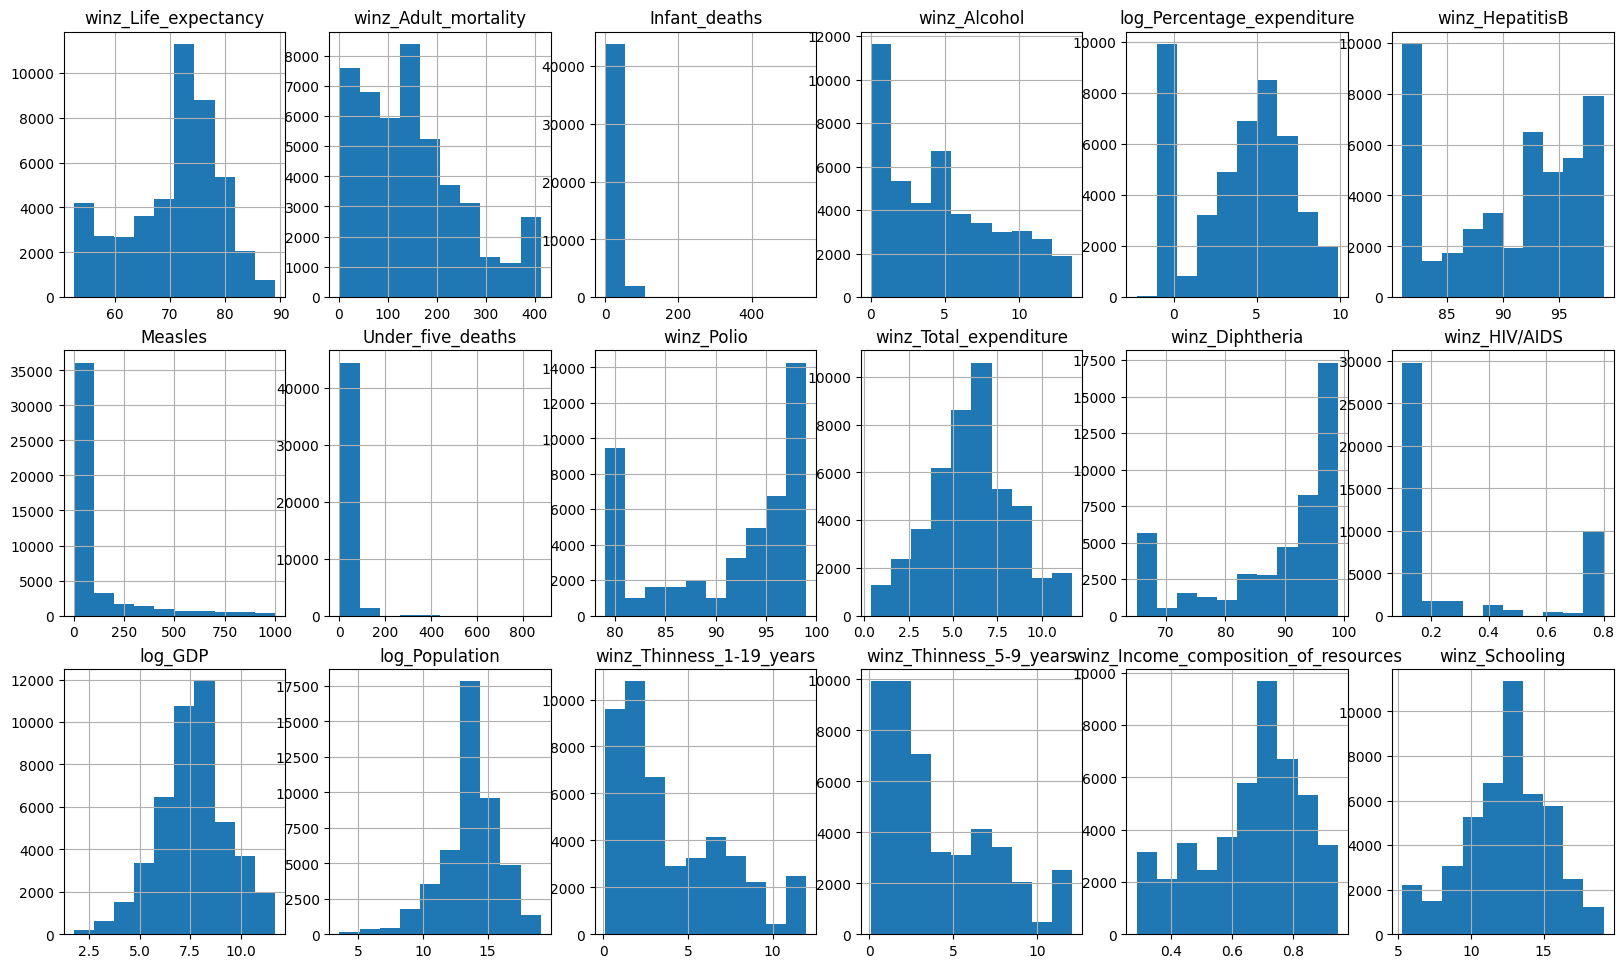

In [61]:
fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     plt.hist(data[variable])
                     plt.title(variable)
                     plt.ylabel('')

                     plt.grid(True)

plt.show()

<ipython-input-62-3564c897df86>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(life_exp.corr(), annot =True, linewidths = 4)


<Axes: >

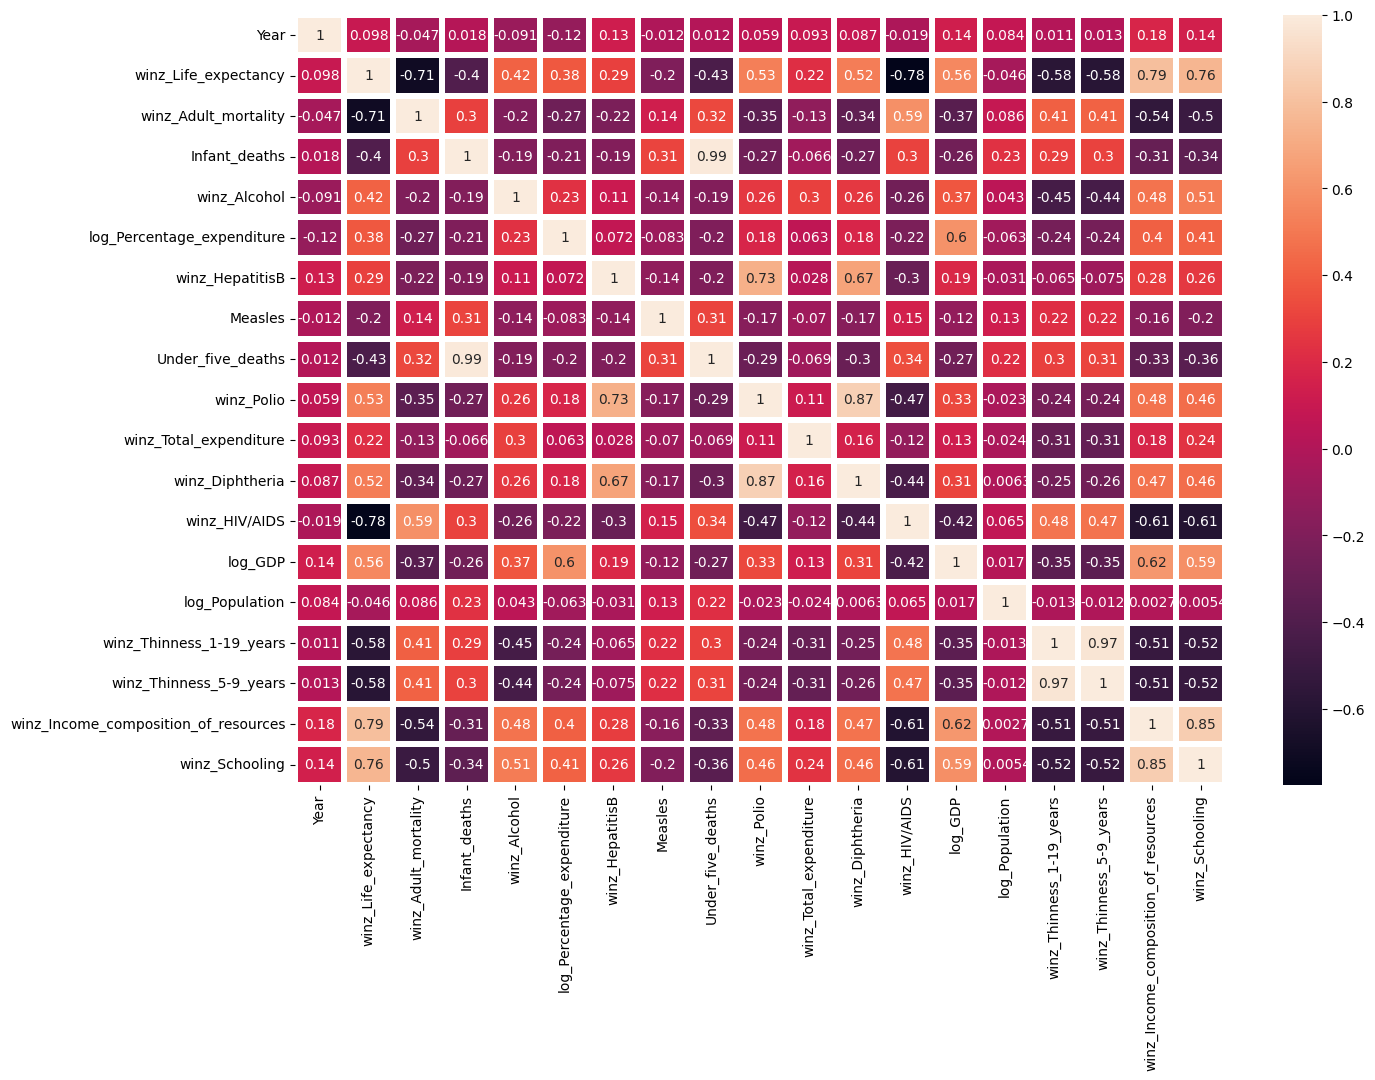

In [62]:
life_exp = data[['Year', 'Country', 'Status','winz_Life_expectancy','winz_Adult_mortality','Infant_deaths','winz_Alcohol',
            'log_Percentage_expenditure','winz_HepatitisB','Measles','Under_five_deaths','winz_Polio',
            'winz_Total_expenditure','winz_Diphtheria','winz_HIV/AIDS','log_GDP','log_Population',
            'winz_Thinness_1-19_years','winz_Thinness_5-9_years','winz_Income_composition_of_resources',
            'winz_Schooling']]
plt.figure(figsize=(15,10))
sns.heatmap(life_exp.corr(), annot =True, linewidths = 4)

Some insights from the heatmap are following:

Adult_mortality has negative relation with Schooling, Income_composition_of_resources and positive relation with HIV/AIDS.

Infant_deaths and Under_five_deaths have strong positive relationship.

Schooling and Alcohol have some positive relationship.

Percentage_expenditure has positive relation with Schooling, Income_composition_of_resources, GDP, and Life_expectancy.

HepatitisB has strong positive relation with Polio and Diphtheria. Polio also has strong positive relation with Diphtheria,HepatitisB, and Life_expectancy.

Diphtheria has strong positive relation with Polio and Life_expectancy.

Through data exploration we will try to explore life_expectancy.

As we can see from the heat map that Life_expectancy has positive relation with schooling,Income_composition_of_resources, GDP,Diphtheria, Polio, and Percentage_expenditure.

Life_expectancy has negative relation with Adult_mortality, Thinness_1-19_years, Thinness_5-9_years, HIV/AIDS, Under_five_deaths, and Infant_deaths.

In [63]:
status_life_exp = data.groupby(by=['Status']).mean().reset_index().sort_values('winz_Life_expectancy',ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,10))

fig = px.bar(status_life_exp, x='Status', y='winz_Life_expectancy',color='winz_Life_expectancy')

fig.update_layout(
        title="Life expectancy according to status",
        xaxis_title="Status",
        yaxis_title="Average Life Expectancy",
        font=dict(
            family="Courier New",
            size=16,
            color="black"
        )
    )
fig.show()

<ipython-input-63-a4cd13190535>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  status_life_exp = data.groupby(by=['Status']).mean().reset_index().sort_values('winz_Life_expectancy',ascending=False).reset_index(drop=True)


<Figure size 2000x1000 with 0 Axes>

In [64]:
life_year = data.groupby(by = ['Year', 'Status']).mean().reset_index()
Developed = life_year.loc[life_year['Status'] == 'Developed',:]
Developing = life_year.loc[life_year['Status'] == 'Developing',:]
fig1 = go.Figure()
for template in ["plotly_dark"]:
    fig1.add_trace(go.Scatter(x=Developing['Year'], y=Developing['winz_Life_expectancy'],
                    mode='lines',
                    name='Developing',
                    marker_color='#f075c2'))
    fig1.add_trace(go.Scatter(x=Developed['Year'], y=Developed['winz_Life_expectancy'],
                    mode='lines',
                    name='Developed',
                    marker_color='#28d2c2'))
    fig1.update_layout(
    height=500,
    xaxis_title="Years",
    yaxis_title='Life expectancy in age',
    title_text='Average Life expectancy of Developing and Developed countries over the years',
    template=template)
fig1.show()

<ipython-input-64-885bd11c40d9>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



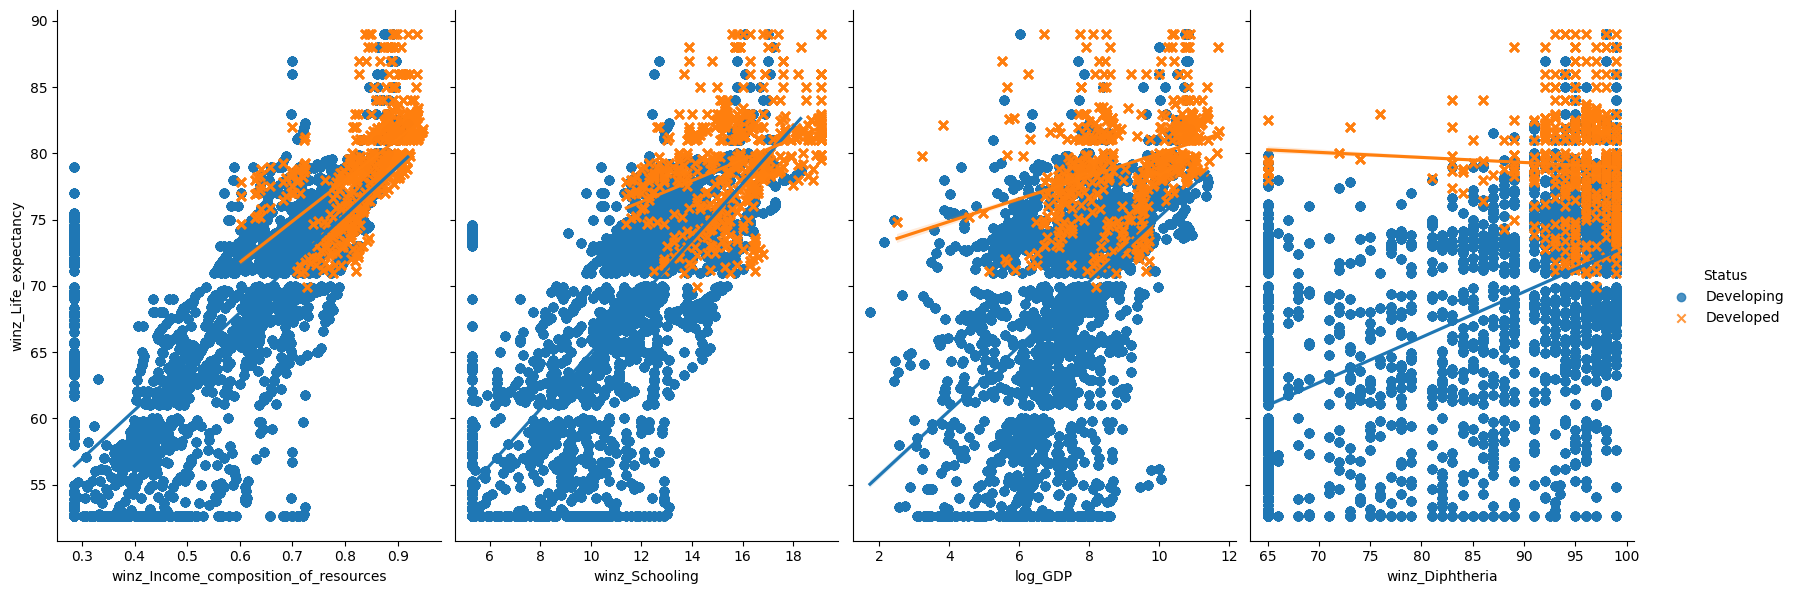

In [65]:
sns.pairplot(data, x_vars=["winz_Income_composition_of_resources", "winz_Schooling","log_GDP","winz_Diphtheria"], y_vars=["winz_Life_expectancy"],
             hue="Status",markers=["o", "x"], height=6, aspect=.7, kind="reg");

Schooling can effect life expectancy more in developing countries than developed countries. This may be because education is more established and prevalent in wealthier countries. This means countries with less corruption, infrastructure, healthcare, welfare, and so forth. Same applies to GDP, Diptheria and Polio.

(60.0, 90.0)

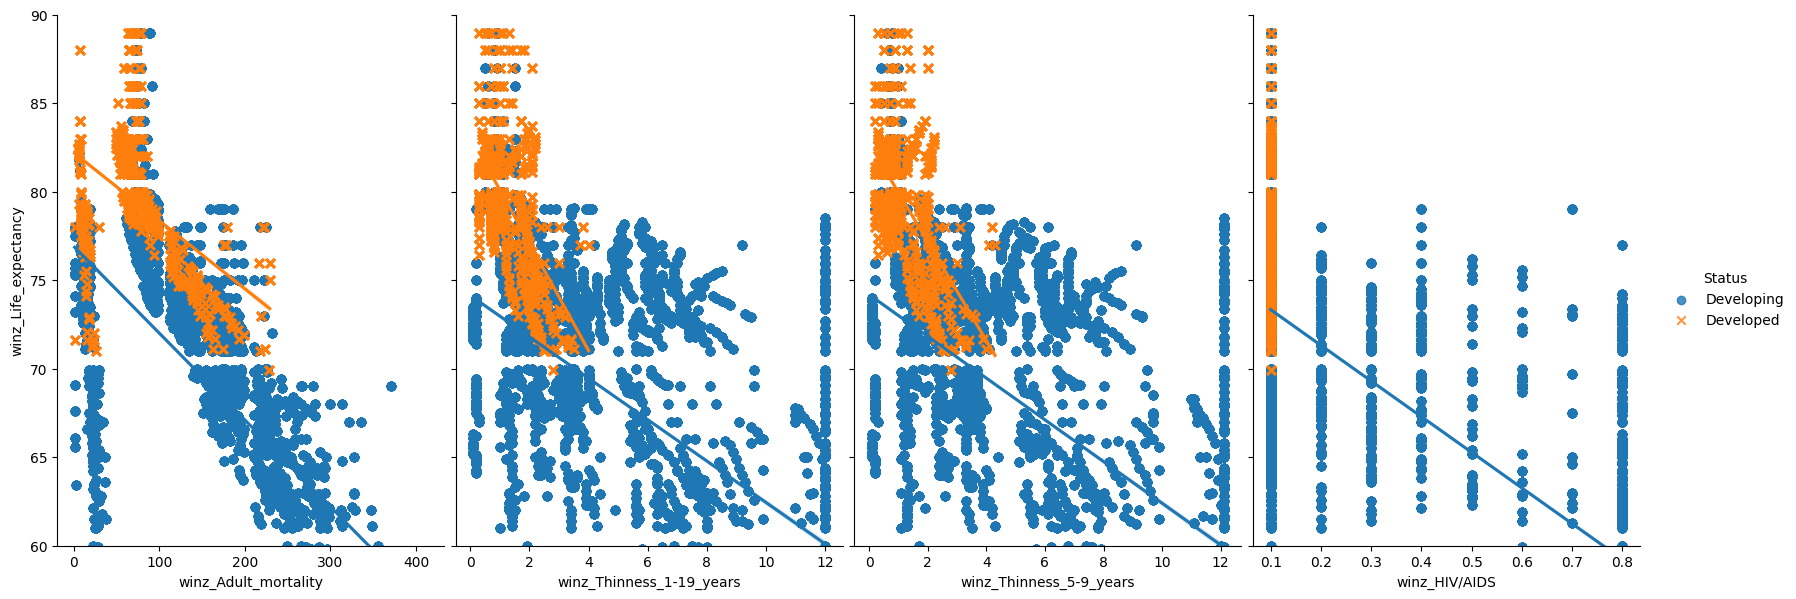

In [66]:
sns.pairplot(data, x_vars=["winz_Adult_mortality", "winz_Thinness_1-19_years","winz_Thinness_5-9_years","winz_HIV/AIDS"], y_vars=["winz_Life_expectancy"],
             hue="Status",markers=["o", "x"], height=6, aspect=.7, kind="reg")
plt.ylim(60, 90)

(60.0, 90.0)

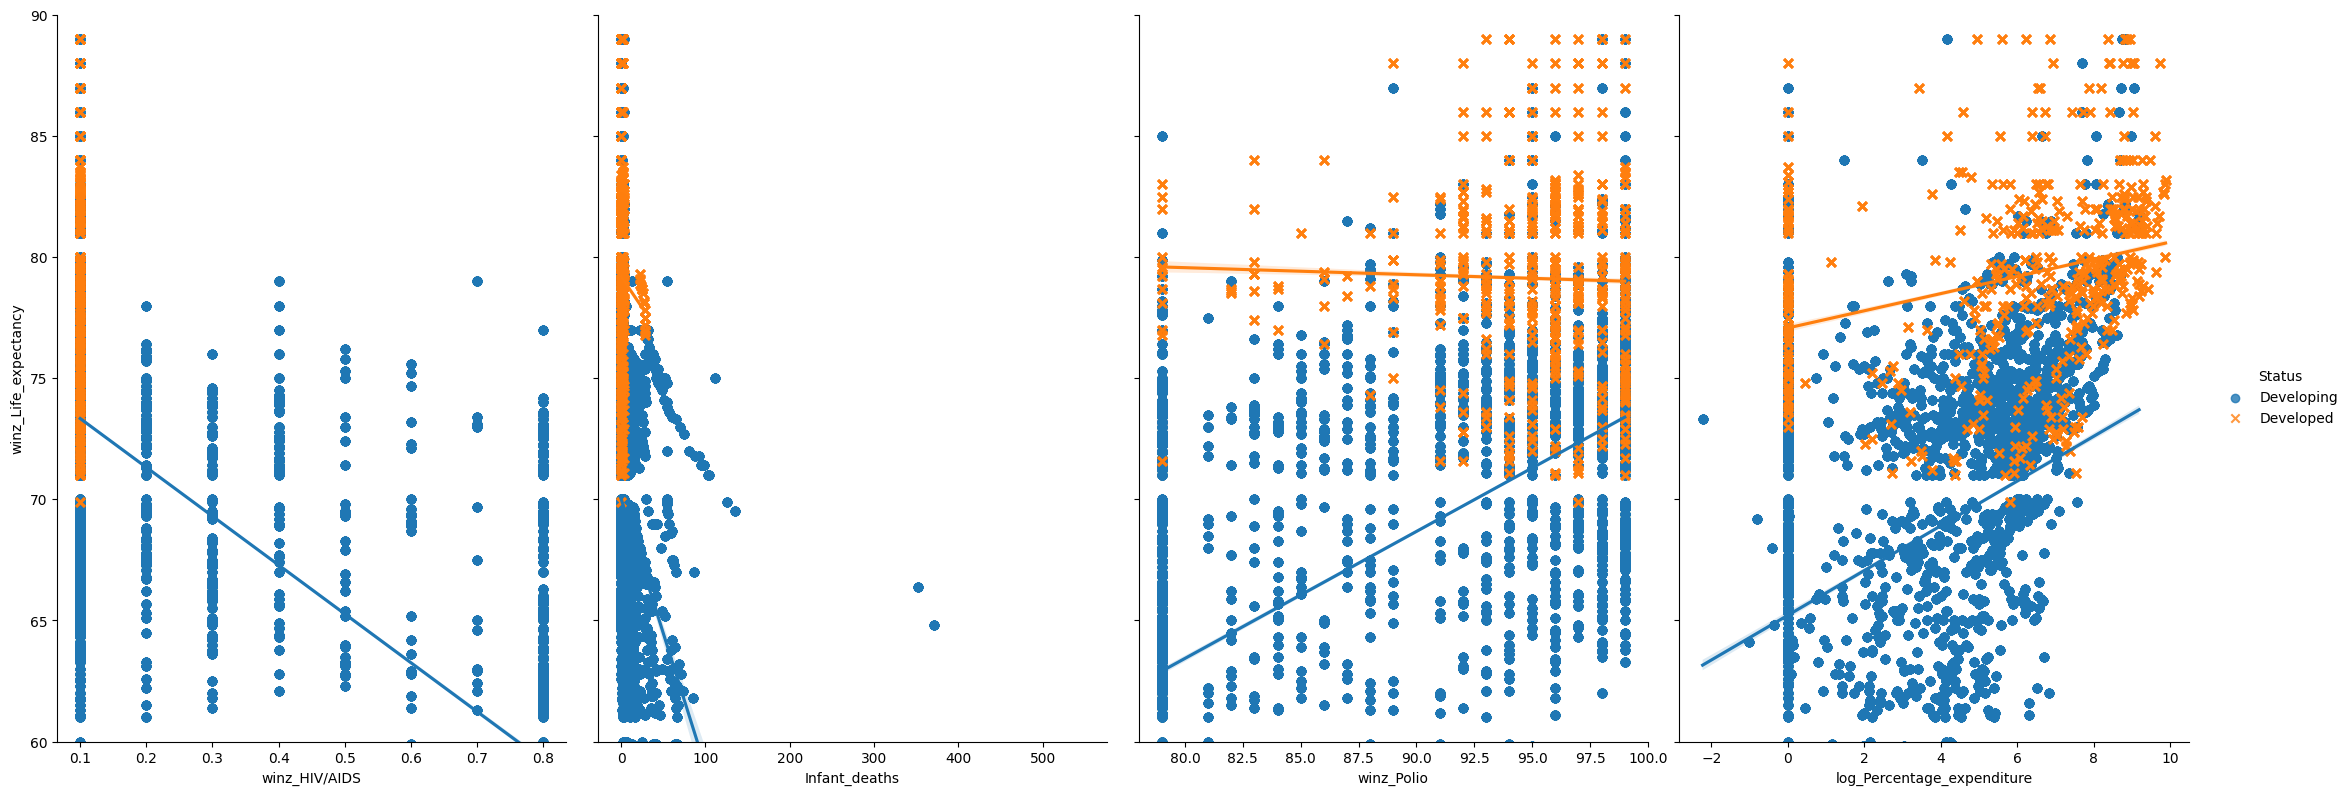

In [67]:
sns.pairplot(data, x_vars=["winz_HIV/AIDS","Infant_deaths","winz_Polio","log_Percentage_expenditure"], y_vars=["winz_Life_expectancy"],
             hue="Status",markers=["o", "x"], height=8, aspect=.7, kind="reg")
plt.ylim(60, 90)

(60.0, 90.0)

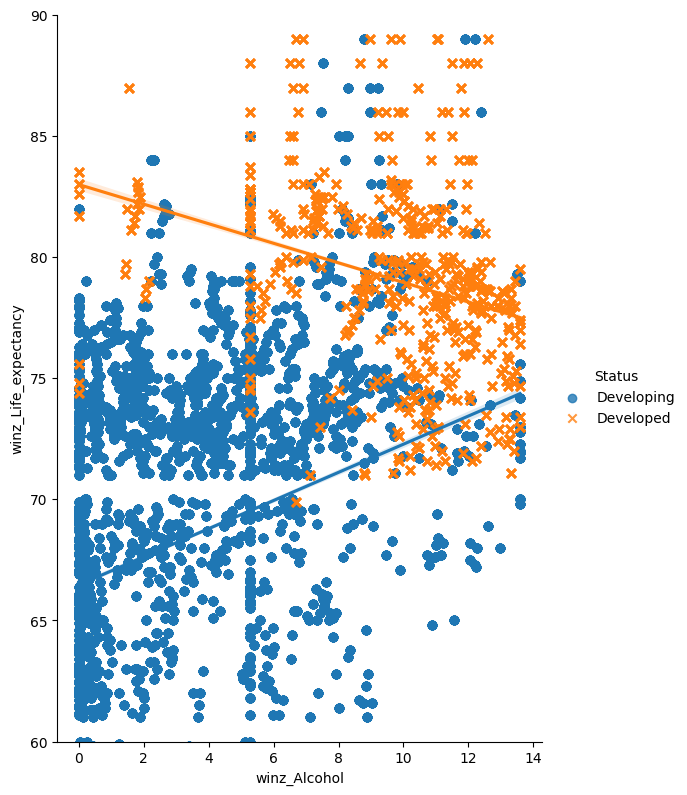

In [68]:
sns.pairplot(data, x_vars=["winz_Alcohol"], y_vars=["winz_Life_expectancy"],
             hue="Status",markers=["o", "x"], height=8, aspect=.7, kind="reg")
plt.ylim(60, 90)

I’m guessing that this is due to the fact that only wealthier countries can afford alcohol or the consumption of alcohol is more prevalent among wealthier populations.

That is why developing countries and alcohol have positive relation and developed countries and alcohol have negative relation.

The following graph shows counrywise life expectancy

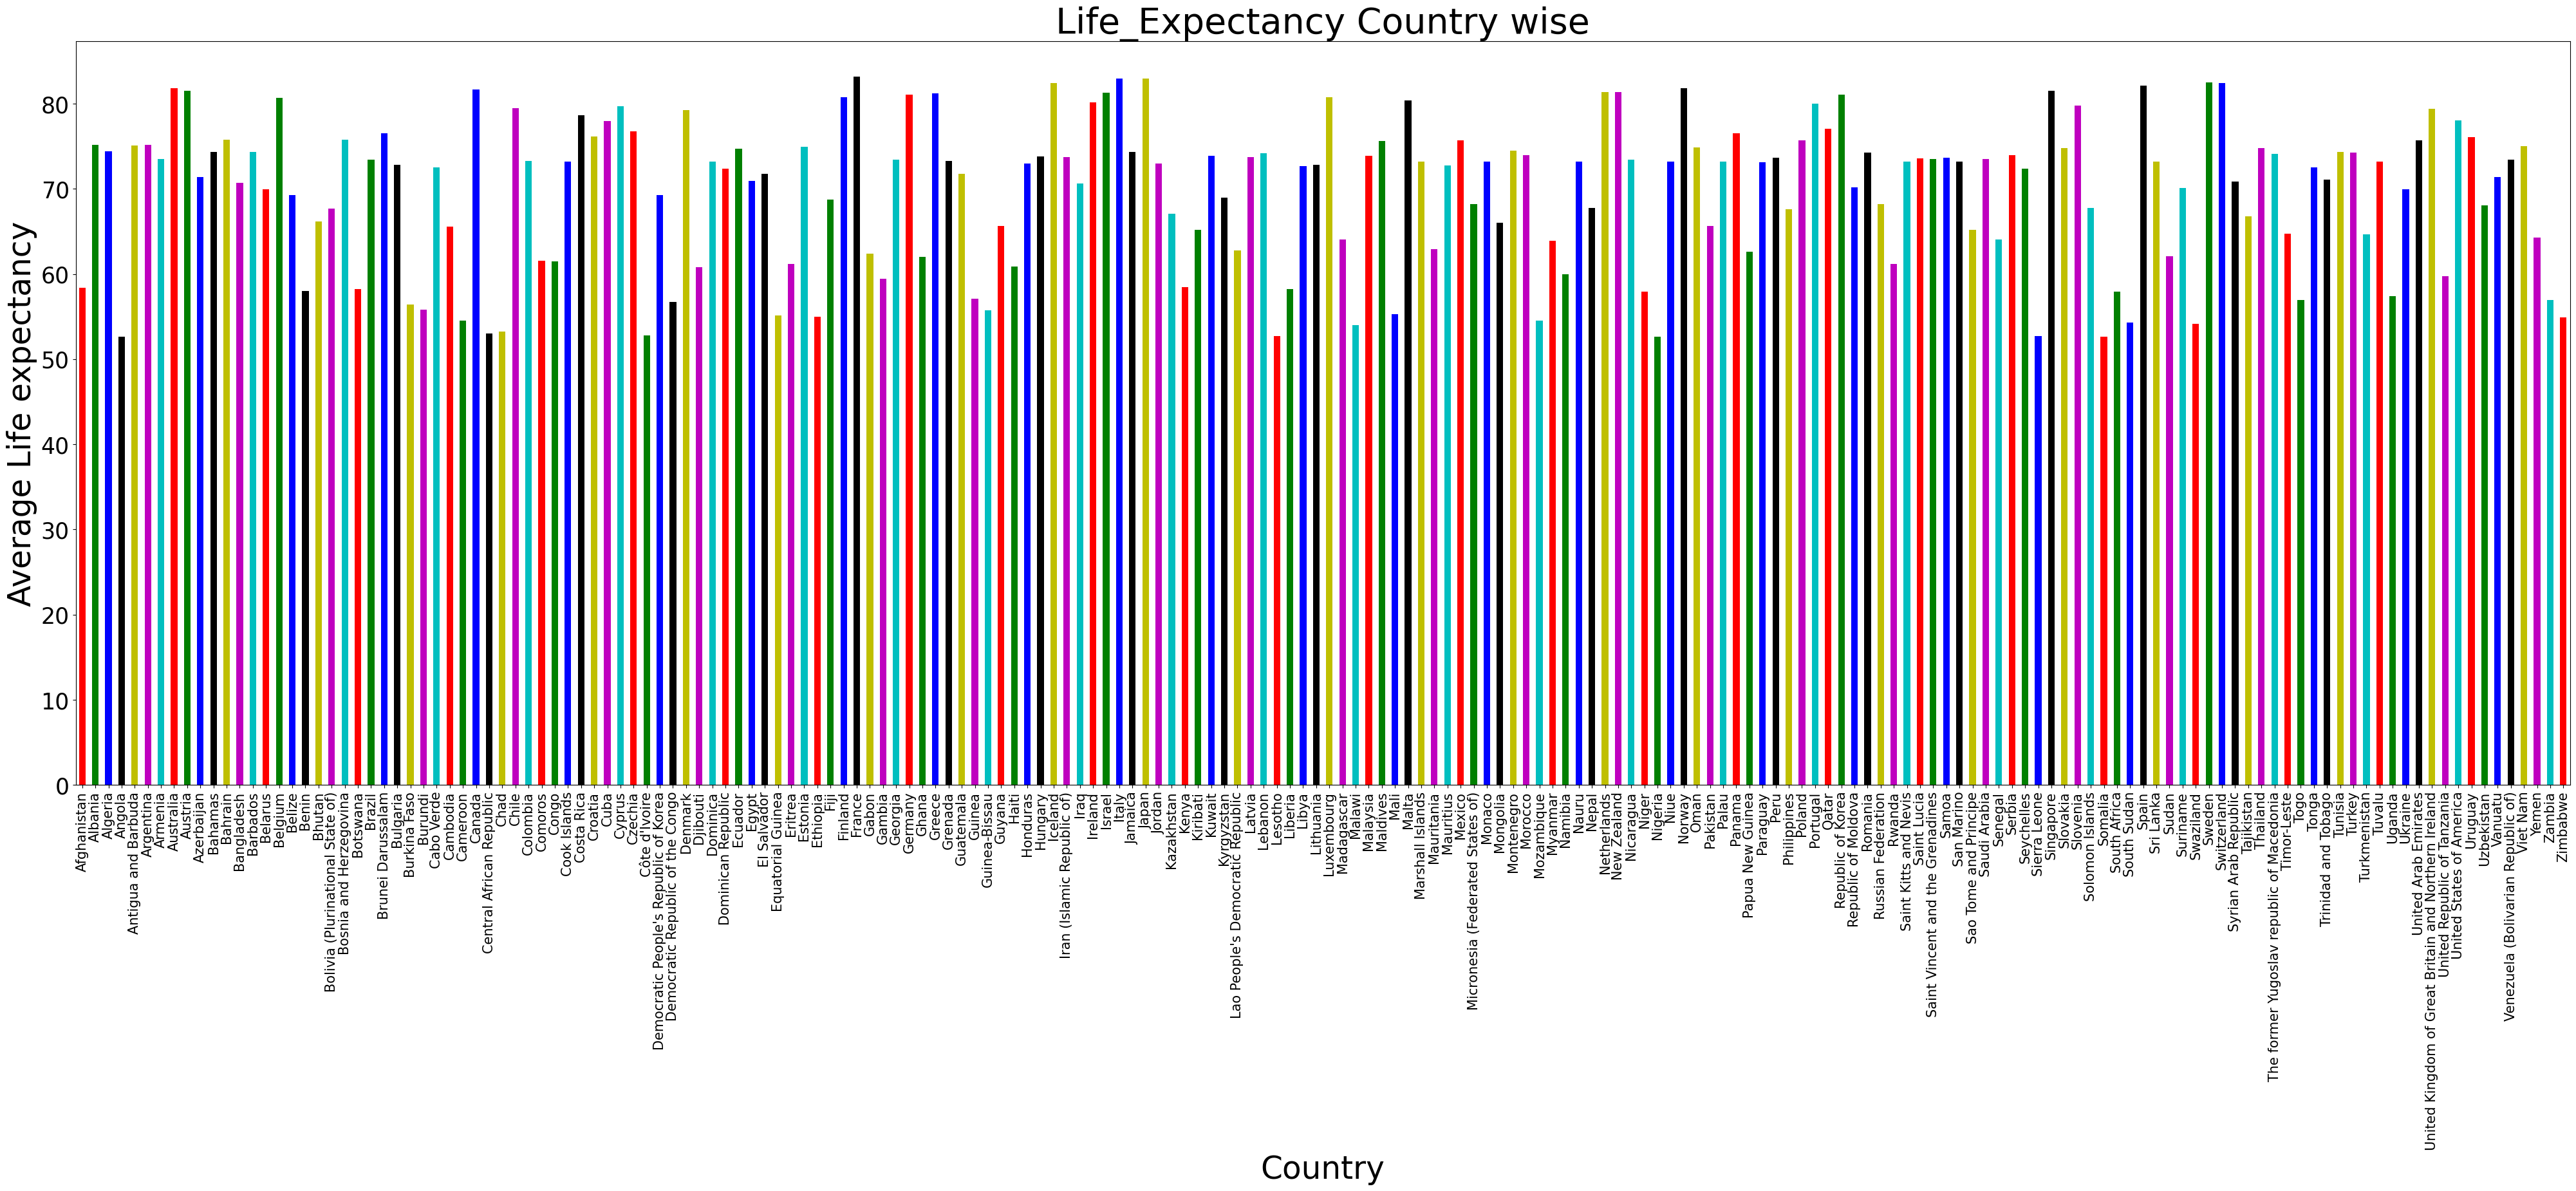

In [69]:
life_country = data.groupby('Country')['winz_Life_expectancy'].mean()
life_country
my_colors = list('rgbkymc')
life_country.plot(kind='bar', figsize=(50,15), fontsize=25,color=my_colors)
plt.title("Life_Expectancy Country wise",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Average Life expectancy",fontsize=35)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()